# Laboratorio Aprendizaje Supervisado.

## Regresión y clasificación binaria con scikit-learn


### Importación de librerias y dataset de california 

In [29]:
#Para analizar 
import pandas as pd 
import numpy as np 

#para graficar
import matplotlib.pyplot as plt 
import seaborn as sb 

#El dataset
from sklearn.datasets import fetch_california_housing

#separación de data
from sklearn.model_selection import train_test_split

#Modelos de regresión
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Metricas que evaluamos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Carga y exploración de datos

### 1.1 Carga del dataset

El dataset *California Housing* se obtiene directamente desde la librería scikit-learn.
Se utiliza el parámetro `as_frame=True` para trabajar con los datos en formato DataFrame de pandas.

In [30]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

x= housing.data
y= housing.target

### 1.2 Estadísticas descriptivas

A continuación se muestran estadísticas descriptivas básicas de las variables independientes
y de la variable objetivo.

In [31]:
x.describe()
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

Se observa que las variables presentan diferentes escalas y rangos de valores.
La variable objetivo corresponde al valor mediano de la vivienda y muestra una dispersión considerable.
Los rangos son de 0-5. Es el valor de la vivienda en cientos de miles de dolares.

### 1.3 Análisis de la variable objetivo y relaciones generales

Se analiza la distribución de la variable objetivo para identificar posibles asimetrías
y comportamientos relevantes para los modelos de regresión.

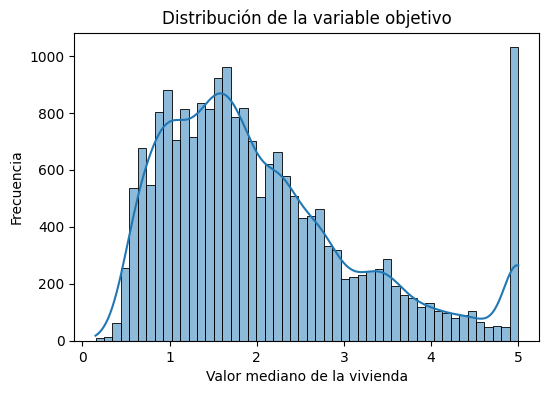

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribución de la variable objetivo")
plt.xlabel("Valor mediano de la vivienda")
plt.ylabel("Frecuencia")
plt.show()

La variable objetivo presenta una distribución asimétrica con cola hacia valores altos.
Además, se observa una acumulación de observaciones en el valor máximo, lo que sugiere
un efecto de censura en los datos. Esta característica puede dificultar el ajuste de
modelos lineales y favorecer modelos no lineales capaces de capturar relaciones más
complejas.

La variable objetivo representa el valor mediano de la vivienda en centenas de miles de dólares.
El valor máximo se encuentra censurado en 5, lo que implica que propiedades con valores
superiores a 500.000 USD son representadas de forma indistinguible.

### Relaión general entre variables 

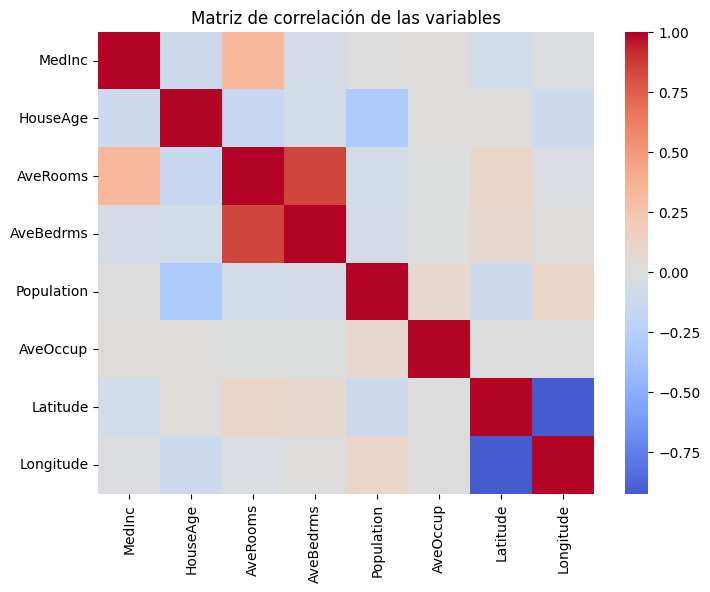

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación de las variables")
plt.show()

La matriz de correlación muestra que la variable MedInc presenta una correlación positiva
moderada con el valor mediano de la vivienda, lo que indica su relevancia predictiva.
Asimismo, se observa una alta correlación entre algunas variables independientes, como
AveRooms y AveBedrms, lo que podría generar multicolinealidad en modelos lineales.
Los modelos basados en árboles resultan menos sensibles a este fenómeno.

___

## 2. Separación de los datos

El dataset se divide en conjuntos de entrenamiento y prueba con el objetivo de evaluar
la capacidad de generalización de los modelos. Se utiliza un 80% de los datos para
entrenamiento y un 20% para prueba. Además, se fija el parámetro `random_state` para
garantizar la reproducibilidad de los resultados.

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, y_train.shape # para ver como se separan los datos de entrenamiento 
x_test.shape, y_test.shape # para ver como se separan los datos de prueba

((4128, 8), (4128,))

La proporción elegida permite entrenar los modelos con una cantidad suficiente de datos,
manteniendo un conjunto de prueba representativo. El uso de una semilla fija asegura que
los resultados puedan ser reproducidos.

___

## 3. Entrenamiento inicial de los modelos de regresión

En esta sección se entrenan distintos modelos de regresión utilizando los
hiperparámetros por defecto, con el objetivo de obtener un desempeño inicial
que sirva como referencia para comparaciones posteriores.

In [35]:
#Regresión Lineal

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)

In [36]:
#Árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

y_pred_tree = tree_model.predict(x_test)

In [37]:
#Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)  

### 3.4 Evaluación de los modelos en el conjunto de prueba
En esta sección se evalúa el desempeño de los modelos entrenados utilizando el conjunto
de prueba. Para ello, se calculan métricas de regresión que permiten cuantificar el error
de predicción y la capacidad explicativa de cada modelo.

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluar(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

resultados = {
    "Regresión Lineal": evaluar(y_test, y_pred_linear),
    "Árbol de Decisión": evaluar(y_test, y_pred_tree),
    "Random Forest": evaluar(y_test, y_pred_rf)
}

resultados

{'Regresión Lineal': {'MAE': 0.533200130495655,
  'RMSE': np.float64(0.745581383012776),
  'R2': 0.5757877060324512},
 'Árbol de Decisión': {'MAE': 0.4557622892441861,
  'RMSE': np.float64(0.7068996727915191),
  'R2': 0.6186632145457622},
 'Random Forest': {'MAE': 0.3275993549176358,
  'RMSE': np.float64(0.5056935709091609),
  'R2': 0.8048502475905297}}

Los resultados iniciales muestran que el modelo de Random Forest presenta el mejor
desempeño en todas las métricas evaluadas, con un menor error promedio y una mayor
capacidad explicativa. Esto sugiere que el problema presenta relaciones no lineales
que son capturadas de mejor manera por modelos basados en árboles.

___

## 4 Optimización de hiperparámetros

La regresión lineal no fue incluida en el proceso de optimización de hiperparámetros,
debido a que su versión estándar no posee hiperparámetros estructurales relevantes
que afecten significativamente la complejidad del modelo.

### 4.1 GridSearchCV

Se utiliza GridSearchCV debido a que el número de hiperparámetros evaluados es acotado
y permite explorar de forma exhaustiva todas las combinaciones posibles. Además,
GridSearchCV incorpora validación cruzada, lo que proporciona una estimación más robusta
del desempeño del modelo.

### 4.2 Validación cruzada
Se emplea validación cruzada con 5 particiones para balancear estabilidad en la estimación
del rendimiento y costo computacional.

### 4.3 Optimización — Árbol de Decisión

***Hiperparámetros relevantes***

- max_depht -> controla complejidad 
- min_samples_leaf -> evita sobreajuste 
- min_samples_split -> tamańo mínimo para dividir

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [2, 5, 10]
}

tree = DecisionTreeRegressor(random_state=42)

grid_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_grid_tree,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid_tree.fit(x_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candid

In [48]:
best_grid = grid_tree.best_params_
best_tree = grid_tree.best_estimator_

print(best_grid)
print(best_tree)

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
DecisionTreeRegressor(min_samples_leaf=10, random_state=42)


### 4.2 Optimización — Random Forest

***Hiperparámetros relevantes***

- n_estimators -> números de árboles 
- max_depth -> complejidad 
- max_features -> número de variables por split 
- min_samples_leaf -> regularización 

In [47]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt", "log2"],
    "min_samples_leaf": [1, 5]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid_rf.fit(x_train, y_train)

grid_rf.best_params_
best_rf = grid_rf.best_estimator_

print(grid_rf.best_params_)
print(best_rf)

{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}
RandomForestRegressor(max_depth=20, max_features='log2', random_state=42)


GridSearchCV retorna el modelo que obtiene el mejor desempeño promedio en validación cruzada,
junto con los hiperparámetros asociados. Además, permite acceder a los resultados completos
de cada combinación evaluada.

___

## 5 Evaluación del rendimiento 


In [51]:
y_pred_tree_opt = best_tree.predict(x_test)
y_pred_rf_opt = best_rf.predict(x_test)

resultados_opt = {
    "Árbol Optimizado": evaluar(y_test, y_pred_tree_opt),
    "Random Forest Optimizado": evaluar(y_test, y_pred_rf_opt)
}

resultados_opt

{'Árbol Optimizado': {'MAE': 0.40481361504421026,
  'RMSE': np.float64(0.6031772021916121),
  'R2': 0.7223593982604586},
 'Random Forest Optimizado': {'MAE': 0.3225095278817737,
  'RMSE': np.float64(0.49293928769775935),
  'R2': 0.8145699965501119}}

Se empleó validación cruzada con 5 particiones (cv=5), lo que permite obtener
una estimación más robusta del desempeño promedio del modelo, reduciendo la
dependencia de una única división de los datos y mejorando la estabilidad de
los resultados.

La optimización de hiperparámetros produjo una mejora significativa en el Árbol de Decisión,
reduciendo el error y aumentando su capacidad explicativa. En el caso del Random Forest,
la mejora fue más moderada, dado que su desempeño inicial ya era elevado.

En términos generales, el Random Forest optimizado mantiene el mejor rendimiento,
logrando el menor error y el mayor R², lo que confirma su capacidad para capturar
relaciones no lineales en los datos.